<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SVMs-con-el-dataset-de-Enfermedades-cardíacas-(Heart)" data-toc-modified-id="SVMs-con-el-dataset-de-Enfermedades-cardíacas-(Heart)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SVMs con el dataset de Enfermedades cardíacas (Heart)</a></span></li><li><span><a href="#SVMs-con-el-dataset-de-Enfermedades-cardíacas-(Heart)" data-toc-modified-id="SVMs-con-el-dataset-de-Enfermedades-cardíacas-(Heart)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SVMs con el dataset de Enfermedades cardíacas (Heart)</a></span><ul class="toc-item"><li><span><a href="#2.1-Entendimiento-y-preparación-de-los-datos" data-toc-modified-id="2.1-Entendimiento-y-preparación-de-los-datos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2.1 Entendimiento y preparación de los datos</a></span><ul class="toc-item"><li><span><a href="#2.1.2-Visualizaciones-de-una-variable-independiente-vs.-variable-objetivo" data-toc-modified-id="2.1.2-Visualizaciones-de-una-variable-independiente-vs.-variable-objetivo-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>2.1.2 Visualizaciones de una variable independiente vs. variable objetivo</a></span></li><li><span><a href="#2.1.2-Visualizaciones-de-pares-de-variables-independientes-vs.-variable-objetivo" data-toc-modified-id="2.1.2-Visualizaciones-de-pares-de-variables-independientes-vs.-variable-objetivo-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>2.1.2 Visualizaciones de pares de variables independientes vs. variable objetivo</a></span></li></ul></li><li><span><a href="#2.2-PCA" data-toc-modified-id="2.2-PCA-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2 PCA</a></span></li><li><span><a href="#2.3-Pipelines-de-entrenamiento-y-evaluación-del-mejor-modelo" data-toc-modified-id="2.3-Pipelines-de-entrenamiento-y-evaluación-del-mejor-modelo-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>2.3 Pipelines de entrenamiento y evaluación del mejor modelo</a></span><ul class="toc-item"><li><span><a href="#Modelos-sin-preprocesamiento:" data-toc-modified-id="Modelos-sin-preprocesamiento:-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Modelos sin preprocesamiento:</a></span></li><li><span><a href="#Modelos-con-estandarización-de-los-datos:" data-toc-modified-id="Modelos-con-estandarización-de-los-datos:-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Modelos con estandarización de los datos:</a></span></li><li><span><a href="#Modelos-con-estandarización-de-los-datos-y-PCA:" data-toc-modified-id="Modelos-con-estandarización-de-los-datos-y-PCA:-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Modelos con estandarización de los datos y PCA:</a></span></li><li><span><a href="#Modelos-con-estandarización-de-los-datos-y-LDA:" data-toc-modified-id="Modelos-con-estandarización-de-los-datos-y-LDA:-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Modelos con estandarización de los datos y LDA:</a></span></li><li><span><a href="#Curvas-ROC-AUC-de-los-mejores-clasificadores" data-toc-modified-id="Curvas-ROC-AUC-de-los-mejores-clasificadores-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Curvas ROC AUC de los mejores clasificadores</a></span></li></ul></li><li><span><a href="#Optimización-bayesiana" data-toc-modified-id="Optimización-bayesiana-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Optimización bayesiana</a></span></li></ul></li></ul></div>

# SVMs con el dataset de Enfermedades cardíacas (Heart)

Cargamos las librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#import warnings
#warnings.filterwarnings('ignore')
#warnings.filterwarnings(action=‘ignore’,category=DeprecationWarning)
#warnings.filterwarnings(action=‘ignore’,category=FutureWarning)

# SVMs con el dataset de Enfermedades cardíacas (Heart)

El dataset **heart.csv** contiene registros de pacientes con síntomas de problemas cardíacos.
Se tienen los datos provenientes bases de datos de enfermedades del corazón, provenientes del centros médicos *Cleveland Clinic Foundation*

Los campos del dataset son los siguientes:
1. age: edad en años
2. sex: 1=hombre, 0=mujer
3. cp: tipo de dolor de pecho (1=angina típico, 2=angina atípico, 3=dolor no de angina, 4=sin síntoma de dolor)
4. trestbps: presión de la sangre en reposo (en mm/Hg, en el momento de admisión al hospital)
5. chol: nivel del colesterol (en mg/dl)
6. fbs: indica si el nivel de azucar en la sangre en ayunas es superior a 120 mg/dl (1) o no (0)
7. restecg: resultado de electro cardiograma en reposo (0=normal, 1=anormalidad del nivel de ST, 2=hipertrofía ventricular probable)
8. thalach: frecuencia cardiaca máxima alcanzada (pulso)
9. exang: si se induce a una angina a través del ejercicio (1) o no (0)
10. oldpeak: diferencia relativa entre el nivel de ST inducido por el ejercicio comparado con el nivel del reposo.
11. slope: la pendiente de llegada al máximo del nivel ST durante el ejercicio (1=creciente, 2=plana, 3=decreciente)
12. ca: número de venas mayores coloreadas a partir de la fluorescopia (0 a 3)
13. thal: tipo de defecto (valores aceptados 3=normal, 4=defecto arreglado, 7=defecto reversible)
14. target: indica si en efecto el paciente presenta una enfermedad cardiaca (1) o no (0) 

## 2.1 Entendimiento y preparación de los datos

Leemos el archivo con el dataset, cargándolo en memoria

In [3]:
df = pd.read_csv('06-03-Heart.csv', sep=',')
print(df.shape)
df.head(5)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Vamos a renombrar las columnas para facilitar el análisis posterior:

In [4]:
colnames = ["edad", "sexo", "tipo_dolor", "presion", "colesterol", "azucar", "ecg", "pulso", "angina", 
         "st", "pendiente", "venas", "thal", "target"]
df.columns=colnames
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   edad        303 non-null    int64  
 1   sexo        303 non-null    int64  
 2   tipo_dolor  303 non-null    int64  
 3   presion     303 non-null    int64  
 4   colesterol  303 non-null    int64  
 5   azucar      303 non-null    int64  
 6   ecg         303 non-null    int64  
 7   pulso       303 non-null    int64  
 8   angina      303 non-null    int64  
 9   st          303 non-null    float64
 10  pendiente   303 non-null    int64  
 11  venas       303 non-null    int64  
 12  thal        303 non-null    int64  
 13  target      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
var_numericas = ['edad', 'presion', 'colesterol', 'pulso', 'st', 'venas']
var_categoricas = ['sexo', 'tipo_dolor', 'azucar','ecg', 'angina', 'pendiente', 'thal']

Hay 303 registros, con 14 variables, incluyendo la variable objetivo *target* del clasificador (la última).

col_0,count
target,
0,138
1,165


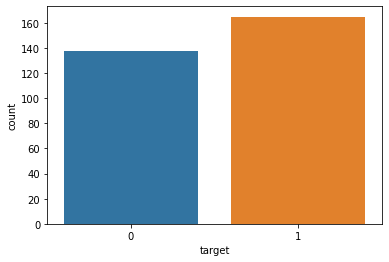

In [6]:
sns.countplot(x="target", data=df)
pd.crosstab(index=df["target"], columns="count")

In [7]:
df.target[df.target==1].aggregate('count') / df.shape[0] * 100

54.45544554455446

Encontramos que la base de datos está aceptablemente balanceada, con un 54% de los individuos presentando una enfermedad cardiaca.

Es necesario remarcar que todas las variables tienen un tipo numérico, lo que es un error, ya que algunas de entre ellas tienen una codificación categórica que no debería interpretarse como una cantidad.

In [8]:
for var in var_categoricas:
    unicos = df[var].unique()
    print('Valores de {}: {}'.format(var, unicos))

Valores de sexo: [1 0]
Valores de tipo_dolor: [3 2 1 0]
Valores de azucar: [1 0]
Valores de ecg: [0 1 2]
Valores de angina: [0 1]
Valores de pendiente: [0 2 1]
Valores de thal: [1 2 3 0]


 De particular atención son las variables *tipo_dolor*, *ecg*, *pendiente*, *thal*, que poseen mas de 2 categorías.

Vamos a crear una estructura donde guardaremos variables en su estado original, ya que vamos a modificarlas para poder utilizarlas todas en la creación del modelo. Utilizaremos la función **copy** de pandas para crear un nuevo objeto independiente del inicial (copia profunda), de tal manera que la modificación de los elementos de un dataframe no afectarán al otro.

In [9]:
df_ori = df.copy(deep=True)

Vamos a cambiar los tipos de datos de las variables categóricas

In [10]:
for var in var_categoricas:
    df[var] = df[var].astype(str)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   edad        303 non-null    int64  
 1   sexo        303 non-null    object 
 2   tipo_dolor  303 non-null    object 
 3   presion     303 non-null    int64  
 4   colesterol  303 non-null    int64  
 5   azucar      303 non-null    object 
 6   ecg         303 non-null    object 
 7   pulso       303 non-null    int64  
 8   angina      303 non-null    object 
 9   st          303 non-null    float64
 10  pendiente   303 non-null    object 
 11  venas       303 non-null    int64  
 12  thal        303 non-null    object 
 13  target      303 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 33.3+ KB


### 2.1.2 Visualizaciones de una variable independiente vs. variable objetivo

Vamos a realizar unas visualizaciones para entender el poder predictivo de cada variable.

Para las variables categóricas, creamos plots de barras de conteo de instancias para cada clase.

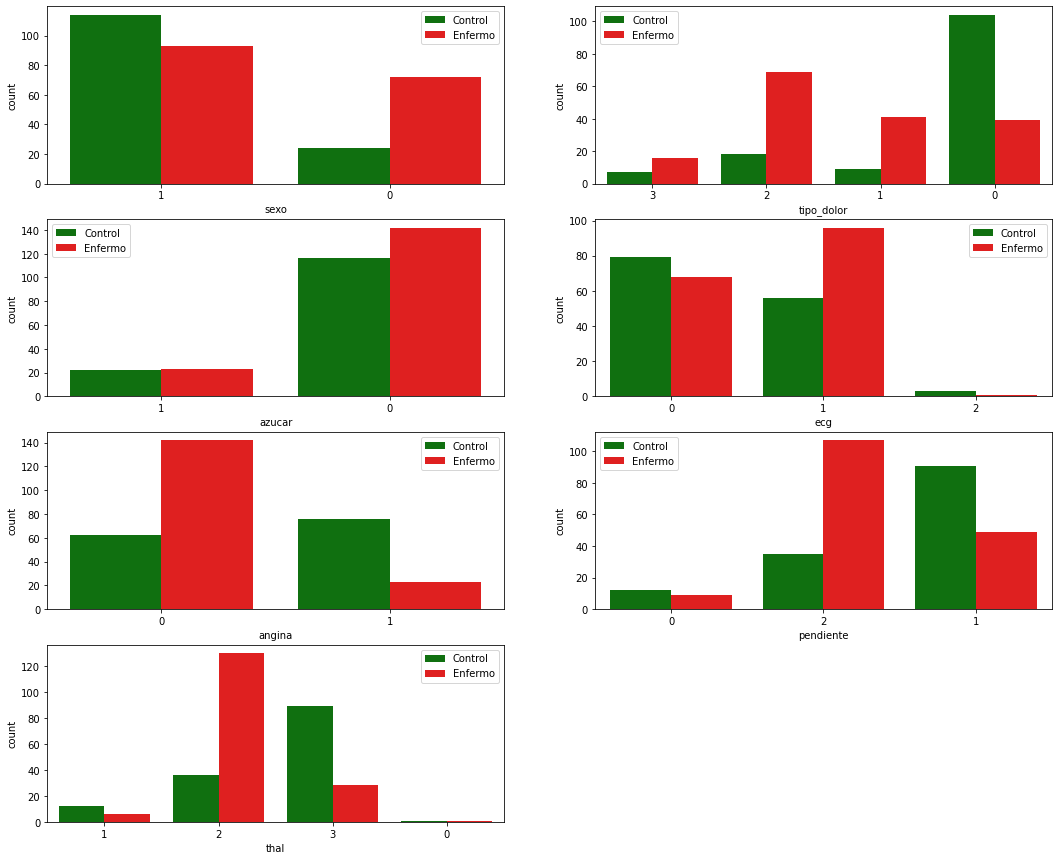

In [12]:
fig = plt.figure(figsize=(18,15))
i=1
for variable in var_categoricas:
    ax = fig.add_subplot(math.ceil(len(var_categoricas)/2), 2, i)
    sns.countplot(x=variable, hue="target", data=df, palette={0: 'g', 1: 'r'})
    plt.legend(['Control', 'Enfermo'])
    i+=1

Para las variables numéricas, creamos plots de densidad de los valores

In [13]:
var_numericas[0:5]

['edad', 'presion', 'colesterol', 'pulso', 'st']

C:\Install\anaconda3\envs\tf-py397\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Install\anaconda3\envs\tf-py397\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


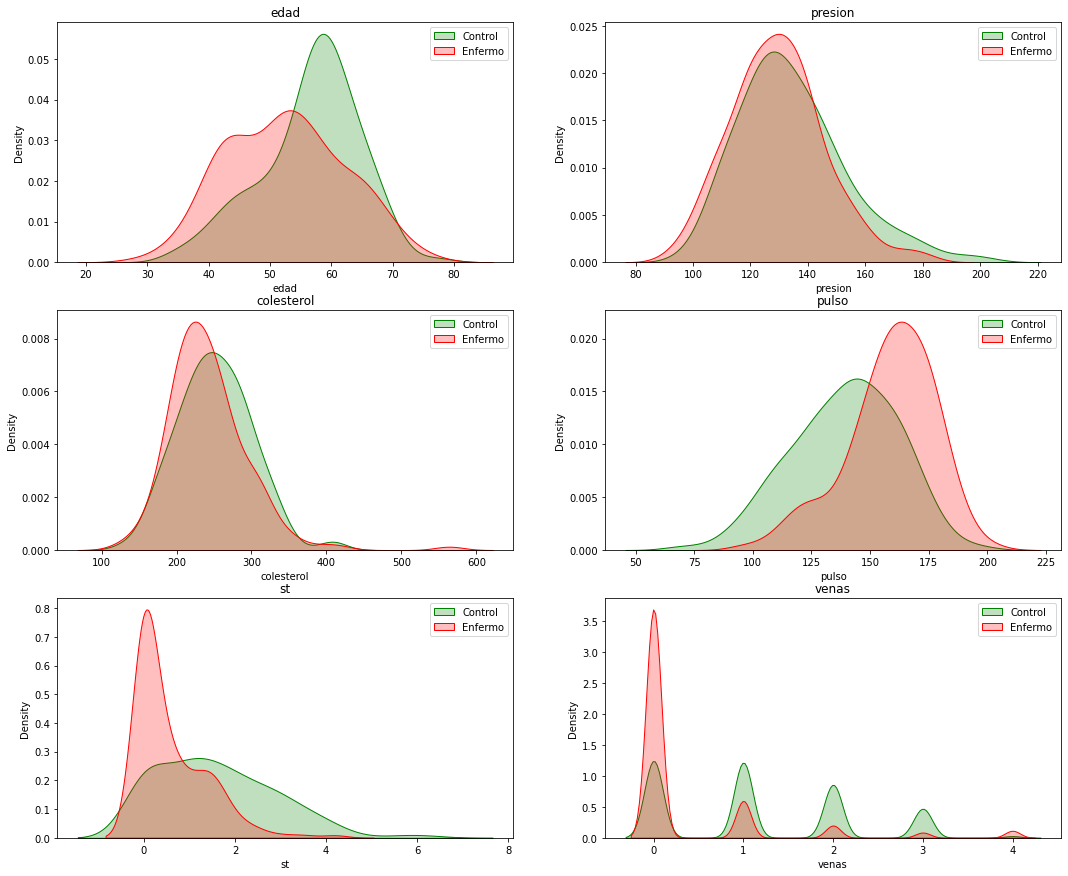

In [14]:
fig = plt.figure(figsize=(18,15)) # Definimos el tamaño de la figura
i=1
for variable in var_numericas[0:5]:
    ax = fig.add_subplot(math.ceil(len(var_numericas)/2), 2, i)
    sns.kdeplot(df.loc[df.target==0, variable], shade=True, color='g', ax=ax);
    sns.kdeplot(df.loc[df.target==1, variable], shade=True, color='r', ax=ax);
    plt.title(variable)
    plt.legend(['Control', 'Enfermo'])
    i+=1
    
ax = fig.add_subplot(math.ceil(len(var_numericas)/2), 2, i)
sns.kdeplot(df.loc[df.target==0, "venas"], shade=True, color='g', ax=ax,bw=0.1);
sns.kdeplot(df.loc[df.target==1, "venas"], shade=True, color='r', ax=ax,bw=0.1);
plt.title("venas")
plt.legend(['Control', 'Enfermo'])

Obtenemos ahora las variables dummy

In [15]:
dummies = pd.get_dummies(df[var_categoricas])
dummies.head()

,sexo_0,sexo_1,tipo_dolor_0,tipo_dolor_1,tipo_dolor_2,tipo_dolor_3,azucar_0,azucar_1,ecg_0,ecg_1,ecg_2,angina_0,angina_1,pendiente_0,pendiente_1,pendiente_2,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
3,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
4,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


Y creamos un nuevo dataset reemplazando las variables originales por las variables dummy:

In [16]:
df.columns

Index(['edad', 'sexo', 'tipo_dolor', 'presion', 'colesterol', 'azucar', 'ecg',
       'pulso', 'angina', 'st', 'pendiente', 'venas', 'thal', 'target'],
      dtype='object')

In [17]:
df = pd.concat([    df[var_numericas],     dummies,    df[['target']]   ], axis = 1)

In [18]:
df.head().T

,0,1,2,3,4
edad,63.0,37.0,41.0,56.0,57.0
presion,145.0,130.0,130.0,120.0,120.0
colesterol,233.0,250.0,204.0,236.0,354.0
pulso,150.0,187.0,172.0,178.0,163.0
st,2.3,3.5,1.4,0.8,0.6
venas,0.0,0.0,0.0,0.0,0.0
sexo_0,0.0,0.0,1.0,0.0,1.0
sexo_1,1.0,1.0,0.0,1.0,0.0
tipo_dolor_0,0.0,0.0,0.0,0.0,1.0
tipo_dolor_1,0.0,0.0,1.0,1.0,0.0


### 2.1.2 Visualizaciones de pares de variables independientes vs. variable objetivo

Teniendo en cuenta las variables que parecen más importantes de manera independiente, vamos a ver como se relacionan por pares frente a la variable objetivo.

En este caso vamos a utilizar directamente la librería **matplotlib**, sin pasar por **seaborn**. La primera es más verbosa que la segunda, pero permite una mayor flexibilidad.

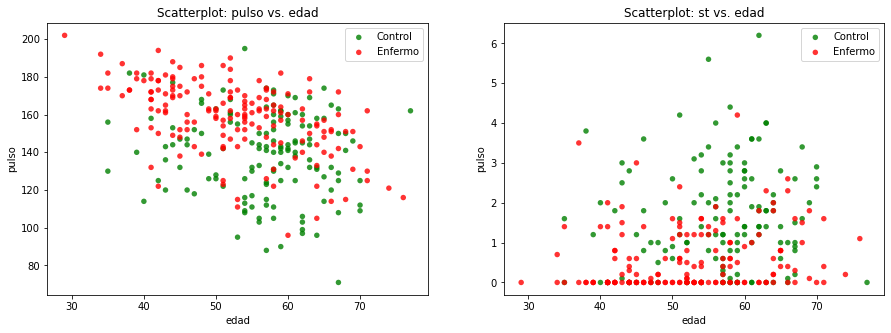

In [19]:
colores = {0: "green", 1: "red"}
labels = {0: "Control", 1: "Enfermo"}
fig, axs = plt.subplots(figsize=[15, 5], ncols=2, nrows=1)

for codigo, group in df.groupby('target'):
    color = colores[codigo]
    label = labels[codigo]
    axs[0].scatter(group["edad"], group["pulso"], alpha=0.8, c=color, edgecolors='none', s=30, label=label)
axs[0].set_xlabel('edad')
axs[0].set_ylabel('pulso')
axs[0].set_title('Scatterplot: pulso vs. edad')
axs[0].legend(loc="best")

for codigo, group in df.groupby('target'):
    color = colores[codigo]
    label = labels[codigo]
    axs[1].scatter(group["edad"], group["st"], alpha=0.8, c=color, edgecolors='none', s=30, label=label)
axs[1].set_xlabel('edad')
axs[1].set_ylabel('pulso')
axs[1].set_title('Scatterplot: st vs. edad')
axs[1].legend(loc="best")


plt.show()

## 2.2 PCA

<font color='red'>El siguiente tratamiento es meramente ilustrativo. Al haber variables dummies en el dataset, no se debería utilizar PCA.</font>

Vamos a visualizar los datos utilizando PCA (2 primeras dimensiones).

In [20]:
from sklearn import preprocessing
X_std = preprocessing.scale(df.iloc[:,:(len(df.columns)-1)])


In [21]:
X_std.shape

(303, 26)

In [22]:
i=0
for var in df.columns[:(len(df.columns)-1)]:
    print("{}: {}, {}".format(var, np.mean(X_std[:,i]), np.std(X_std[:,i])))
    i+=1

edad: 4.6900510611227736e-17, 1.0
presion: -7.035076591684161e-16, 1.0
colesterol: -1.1138871270166586e-16, 0.9999999999999999
pulso: -6.800574038628022e-16, 0.9999999999999998
st: 2.3450255305613868e-17, 1.0
venas: -2.3450255305613868e-17, 0.9999999999999999
sexo_0: 2.3450255305613868e-17, 1.0
sexo_1: -1.407015318336832e-16, 1.0
tipo_dolor_0: 4.6900510611227736e-17, 1.0
tipo_dolor_1: 7.03507659168416e-17, 0.9999999999999999
tipo_dolor_2: 4.6900510611227736e-17, 0.9999999999999999
tipo_dolor_3: 5.862563826403467e-18, 1.0
azucar_0: 7.91446116564468e-17, 1.0
azucar_1: -2.3450255305613868e-17, 1.0
ecg_0: 1.75876914792104e-17, 0.9999999999999999
ecg_1: 4.6900510611227736e-17, 0.9999999999999999
ecg_2: 3.51753829584208e-17, 1.0
angina_0: -2.3450255305613868e-17, 1.0
angina_1: -4.6900510611227736e-17, 1.0
pendiente_0: 2.3450255305613868e-17, 1.0
pendiente_1: -2.3450255305613868e-17, 0.9999999999999998
pendiente_2: -9.380102122245547e-17, 0.9999999999999999
thal_0: 0.0, 0.9999999999999998
tha

In [23]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_std)

PCA()

Una vez ajustado el objeto PCA a un dataset, este permite acceder a diferentes aspectos resultantes de la transformación:
- components_: los ejes de los componentes principales en función de las variables originales. Como teníamos 6 variables, vamos a tener 6 PCs, cada uno con las cargas (*loadings*) correspondientes a cada variable original.

In [24]:
pca.components_

array([[-1.59236911e-01, -9.72176386e-02, -4.27303893e-02,
         2.84690370e-01, -2.78932159e-01, -1.66064853e-01,
         1.44737226e-01, -1.44737226e-01, -2.95955631e-01,
         1.87976580e-01,  1.70373342e-01,  3.35284167e-03,
         4.98195522e-02, -4.98195522e-02, -1.19562658e-01,
         1.30946886e-01, -5.00992708e-02,  3.14383764e-01,
        -3.14383764e-01, -7.90156095e-02, -2.56809888e-01,
         2.96789062e-01, -3.56807715e-03, -1.01532059e-01,
         3.17190550e-01, -2.74364329e-01],
       [ 2.57932534e-01,  1.75243552e-01,  2.46351530e-01,
        -1.10665958e-01,  8.21413701e-02,  3.00762522e-02,
         4.85197117e-01, -4.85197117e-01, -1.16501881e-02,
        -8.05147254e-02,  7.77739352e-02,  1.94814082e-03,
        -9.22930021e-02,  9.22930021e-02,  2.58546256e-01,
        -2.89279585e-01,  1.35127434e-01,  3.90728057e-02,
        -3.90728057e-02,  2.67123688e-02,  1.48037300e-01,
        -1.61496579e-01,  1.50873686e-02, -1.63073908e-02,
         2.24

- explained_variance_: la varianza explicada por cada eje en las unidades originales

In [25]:
pca.explained_variance_

array([4.81159062e+00, 2.49447342e+00, 2.32402940e+00, 1.85092288e+00,
       1.64098569e+00, 1.40456244e+00, 1.38332851e+00, 1.28064490e+00,
       1.16460023e+00, 1.05419308e+00, 1.01503748e+00, 9.35981224e-01,
       8.85869037e-01, 8.63916701e-01, 7.63968906e-01, 7.14486313e-01,
       6.66507885e-01, 4.23434968e-01, 4.07559040e-01, 2.39118418e-31,
       1.30465747e-31, 1.09963038e-31, 4.44621171e-32, 2.63991576e-32,
       2.63991576e-32, 7.48878865e-33])

- explained_variance_ratio_: la proporción de la varianza explicada por cada eje, en porcentaje (la suma da 100%).

In [26]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
var_exp

array([1.84450415e-01, 9.56246473e-02, 8.90907436e-02, 7.09543932e-02,
       6.29065343e-02, 5.38433431e-02, 5.30293488e-02, 4.90930136e-02,
       4.46444871e-02, 4.04120728e-02, 3.89110584e-02, 3.58804684e-02,
       3.39594376e-02, 3.31179035e-02, 2.92864445e-02, 2.73895489e-02,
       2.55503150e-02, 1.62322113e-02, 1.56236139e-02, 9.16650954e-33,
       5.00135257e-33, 4.21538938e-33, 1.70443759e-33, 1.01200122e-33,
       1.01200122e-33, 2.87079738e-34])

El objeto PCA sirve además para pasar de la representación en las dimensiones originales a la de las dimensiones en el espacio de los componentes principales encontrados, a partir de su método transform:

In [27]:
X_PCA = pca.transform(X_std)

Veamos gráficamente la cantidad de información correspondiente a cada componente principal:

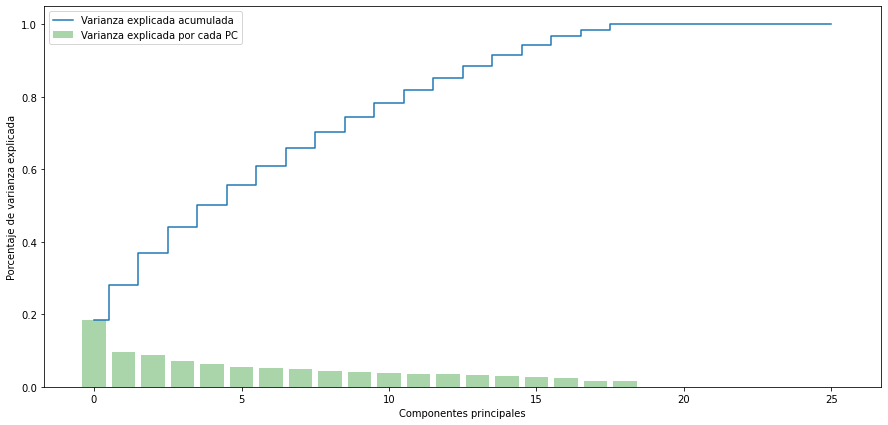

In [28]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [29]:
np.sum(pca.explained_variance_ratio_[0:2])

0.28007506223607226

In [30]:
np.sum(pca.explained_variance_ratio_[0:10])

0.744048998639868

Encontramos que los primeros 10 componentes conservan el 74.4% de la información original. Con 2 ejes, solo ser conserva el 28% de la información.

Vamos a crear un plot mostrando los dos primeros componentes con respecto a la variable objetivo:

In [31]:
df_pca = pd.concat([    pd.DataFrame(X_PCA[:,0:2]), df[['target']]  ], axis = 1)
df_pca.columns=['PC1', 'PC2', 'target']
df_pca.head()

,PC1,PC2,target
0,-1.407391,0.740081,1
1,1.502417,-1.093172,1
2,2.945509,1.089448,1
3,2.809178,-1.684810,1
4,0.737902,1.076580,1


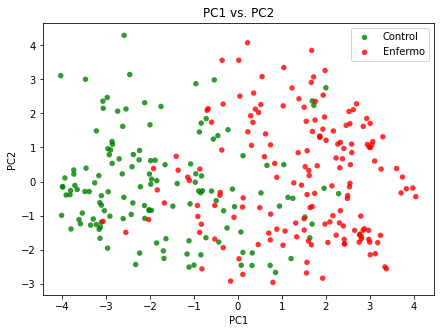

In [32]:
colores = {0: "green", 1: "red"}
labels = {0: "Control", 1: "Enfermo"}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1, 1, 1)

for codigo, group in df_pca.groupby('target'):
    color = colores[codigo]
    label = labels[codigo]
    ax.scatter(group["PC1"], group["PC2"], alpha=0.8, c=color, edgecolors='none', s=30, label=label)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PC1 vs. PC2')
ax.legend(loc="best")
plt.show()


## 2.3 Pipelines de entrenamiento y evaluación del mejor modelo

Utilizando objetos **Pipeline**, encuentren el mejor modelo **SVC** para el dataset analizado. Haga diferentes intentos, variando:

- el tipo de normalización utilizada (Sin normalización, con **StandardScaler**)
- el tipo de reducción de dimensionalidad (Sin reducción, con **PCA**, con **LDA**), especificando None, 10, 15 y 20 dimensiones
- el tipo de kernel utilizado por un modelo **SVC** (linear, rbf, o sigmoid). El kernel poly, al tener 26 variables no es una opción viable.
- el valor del parámetro *C*
- el valor del parámetro *gamma* cuando aplique

Trabaje sobre el 70% de los datos, particionados de manera estratificada según la variable objetivo.

Utilice 'accuracy', como medida de evaluación de la calidad del ajuste de los modelos, usando el protocolo de evaluación de cross-validation con 5 folds.

Compare las curvas ROC AUC de los 2 mejores clasificadores encontrados.

In [79]:
X_complete = df.iloc[:,:26]
y_complete = df.target

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_complete, y_complete, train_size=0.7, random_state=666)

In [34]:
metrica = 'accuracy'

### Modelos sin preprocesamiento:

In [35]:
steps = [("SVM_linear", SVC(kernel="linear"))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10]}
grid1 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid1.fit(X_train, y_train)
print("score = %3.4f" %(grid1.score(X_test,y_test)))
print(grid1.best_params_)

score = 0.8022
{'SVM_linear__C': 0.1}


In [36]:
steps = [("SVM_rbf", SVC(kernel="rbf"))]
pipeline = Pipeline(steps)
parametros = {'SVM_rbf__C':[0.01,0.1,1,10], 'SVM_rbf__gamma':[0.05,0.01, 1, 5]}
grid2 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid2.fit(X_train, y_train)
print("score = %3.4f" %(grid2.score(X_test,y_test)))
print(grid2.best_params_)

score = 0.5714
{'SVM_rbf__C': 10, 'SVM_rbf__gamma': 0.05}


In [37]:
steps = [("SVM_sigmoid", SVC(kernel="sigmoid"))]
pipeline = Pipeline(steps)
parametros = {'SVM_sigmoid__C':[0.01,0.1,1,10], 'SVM_sigmoid__gamma':[0.05,0.01, 1, 5]}
grid3 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid3.fit(X_train, y_train)
print("score = %3.4f" %(grid3.score(X_test,y_test)))
print(grid3.best_params_)

score = 0.5604
{'SVM_sigmoid__C': 0.01, 'SVM_sigmoid__gamma': 0.05}


### Modelos con estandarización de los datos:

In [38]:
steps = [('STD', StandardScaler()), ("SVM_linear", SVC(kernel="linear",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10]}
grid4 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid4.fit(X_train, y_train)
print("score = %3.4f" %(grid4.score(X_test,y_test)))
print(grid4.best_params_)

score = 0.8022
{'SVM_linear__C': 0.1}


In [39]:
steps = [('STD', StandardScaler()),("SVM_rbf", SVC(kernel="rbf",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_rbf__C':[0.01,0.1,1,10], 'SVM_rbf__gamma':[0.05,0.01, 1, 5]}
grid5 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid5.fit(X_train, y_train)
print("score = %3.4f" %(grid5.score(X_test,y_test)))
print(grid5.best_params_)

score = 0.7802
{'SVM_rbf__C': 0.1, 'SVM_rbf__gamma': 0.01}


In [40]:
steps = [('STD', StandardScaler()), ("SVM_sigmoid", SVC(kernel="sigmoid",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_sigmoid__C':[0.01,0.1,1,10], 'SVM_sigmoid__gamma':[0.05,0.01, 1, 5]}
grid6 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid6.fit(X_train, y_train)
print("score = %3.4f" %(grid6.score(X_test,y_test)))
print(grid6.best_params_)

score = 0.8132
{'SVM_sigmoid__C': 1, 'SVM_sigmoid__gamma': 0.05}


### Modelos con estandarización de los datos y PCA:

In [41]:
steps = [('STD', StandardScaler()), ('PCA', PCA()), ("SVM_linear", SVC(kernel="linear",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10], 'PCA__n_components':[None,10, 15, 20]}
grid7 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid7.fit(X_train, y_train)
print("score = %3.4f" %(grid7.score(X_test,y_test)))
print(grid7.best_params_)

score = 0.8022
{'PCA__n_components': None, 'SVM_linear__C': 0.1}


In [42]:
steps = [('STD', StandardScaler()), ('PCA', PCA()), ("SVM_rbf", SVC(kernel="rbf",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_rbf__C':[0.01,0.1,1,10], 'SVM_rbf__gamma':[0.05,0.01, 1, 5], 'PCA__n_components':[None, 10, 15, 20]}
grid8 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid8.fit(X_train, y_train)
print("score = %3.4f" %(grid8.score(X_test,y_test)))
print(grid8.best_params_)

score = 0.8022
{'PCA__n_components': 10, 'SVM_rbf__C': 1, 'SVM_rbf__gamma': 0.01}


In [43]:
steps = [('STD', StandardScaler()), ('PCA', PCA()), ("SVM_sigmoid", SVC(kernel="sigmoid",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_sigmoid__C':[0.01,0.1,1,10], 'SVM_sigmoid__gamma':[0.05,0.01, 1, 5], 'PCA__n_components':[None, 10, 15, 20]}
grid9 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid9.fit(X_train, y_train)
print("score = %3.4f" %(grid9.score(X_test,y_test)))
print(grid9.best_params_)

score = 0.8132
{'PCA__n_components': None, 'SVM_sigmoid__C': 1, 'SVM_sigmoid__gamma': 0.05}


### Modelos con estandarización de los datos y LDA:

In [44]:
X_train.shape

(212, 26)

In [45]:
steps = [('STD', StandardScaler()), ('LDA', LinearDiscriminantAnalysis()), ("SVM_linear", SVC(kernel="linear",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_linear__C':[0.01,0.1,1,10], 'LDA__n_components':[None, 1]}
grid10 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid10.fit(X_train, y_train)
print("score = %3.4f" %(grid10.score(X_test,y_test)))
print(grid10.best_params_)

score = 0.7912
{'LDA__n_components': None, 'SVM_linear__C': 0.01}


In [46]:
steps = [('STD', StandardScaler()), ('LDA', LinearDiscriminantAnalysis()), ("SVM_rbf", SVC(kernel="rbf",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_rbf__C':[0.01,0.1,1,10], 'SVM_rbf__gamma':[0.05,0.01, 1, 5], 'LDA__n_components':[None, 1]}
grid11 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring='roc_auc')
grid11.fit(X_train, y_train)
print("score = %3.4f" %(grid11.score(X_test,y_test)))
print(grid11.best_params_)

score = 0.8765
{'LDA__n_components': None, 'SVM_rbf__C': 0.01, 'SVM_rbf__gamma': 0.05}


In [47]:
steps = [('STD', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())
         , ("SVM_sigmoid", SVC(kernel="sigmoid",probability=True))]
pipeline = Pipeline(steps)
parametros = {'SVM_sigmoid__C':[0.01,0.1,1,10], 'SVM_sigmoid__gamma':[0.05,0.01, 1, 5], 'LDA__n_components':[None, 1]}
grid12 = GridSearchCV(pipeline, param_grid=parametros, cv=5, scoring=metrica)
grid12.fit(X_train, y_train)
print("score = %3.4f" %(grid12.score(X_test,y_test)))
print(grid12.best_params_)

score = 0.7912
{'LDA__n_components': None, 'SVM_sigmoid__C': 0.1, 'SVM_sigmoid__gamma': 0.05}


### Curvas ROC AUC de los mejores clasificadores

Los mejores modelos son los encontrados con las grillas 11 (87.65%), 6 (81.32%) y 9 (81.32%)

Primero se obtienen las probabilidades de la clasificación

In [48]:
y_train_score11 = grid11.predict_proba(X_train)[:,1]
y_test_score11 = grid11.predict_proba(X_test)[:,1]
y_train_score9 = grid9.predict_proba(X_train)[:,1]
y_test_score9 = grid9.predict_proba(X_test)[:,1]
y_train_score6 = grid6.predict_proba(X_train)[:,1]
y_test_score6 = grid6.predict_proba(X_test)[:,1]

Se calculan las tasas de falsos positivos y de verdaderos positicos al comprar las clases reales con las probabildades obtenidas y se estima el valor AUC debajo de la curva ROC.

In [49]:
false_pos_rate11, true_pos_rate11, _ = roc_curve(y_train, y_train_score11)
roc_auc11 = auc(false_pos_rate11, true_pos_rate11)
false_pos_rate11_test, true_pos_rate11_test, _ = roc_curve(y_test, y_test_score11)
roc_auc11_test = auc(false_pos_rate11_test, true_pos_rate11_test)

false_pos_rate9, true_pos_rate9, _ = roc_curve(y_train, y_train_score9)
roc_auc9 = auc(false_pos_rate9, true_pos_rate9)
false_pos_rate9_test, true_pos_rate9_test, _ = roc_curve(y_test, y_test_score9)
roc_auc9_test = auc(false_pos_rate9_test, true_pos_rate9_test)

false_pos_rate6, true_pos_rate6, _ = roc_curve(y_train, y_train_score6)
roc_auc6 = auc(false_pos_rate6, true_pos_rate6)
false_pos_rate6_test, true_pos_rate6_test, _ = roc_curve(y_test, y_test_score6)
roc_auc6_test = auc(false_pos_rate6_test, true_pos_rate6_test)

Finalmente, se plotea

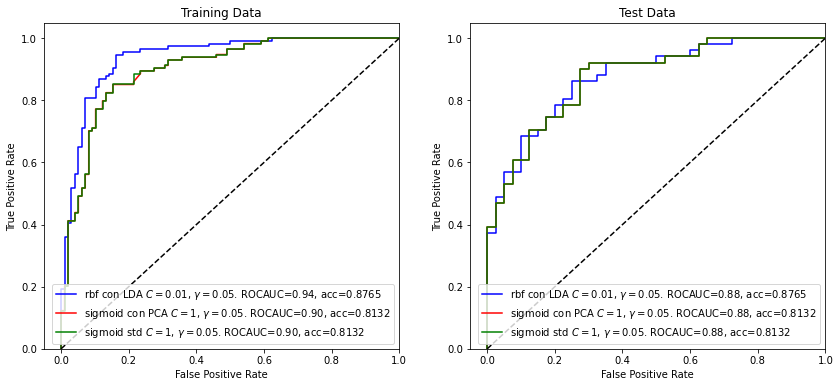

In [50]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.plot(false_pos_rate11, true_pos_rate11, label='rbf con LDA $C=0.01$, $\gamma=0.05$. ROCAUC=%0.2f, acc=0.8765' % roc_auc11, color='b')
ax1.plot(false_pos_rate9, true_pos_rate9, label='sigmoid con PCA $C=1$, $\gamma=0.05$. ROCAUC=%0.2f, acc=0.8132' % roc_auc9, color='r')
ax1.plot(false_pos_rate6, true_pos_rate6, label='sigmoid std $C=1$, $\gamma=0.05$. ROCAUC=%0.2f, acc=0.8132' % roc_auc6, color='g')
ax1.set_title('Training Data')

ax2.plot(false_pos_rate11_test, true_pos_rate11_test, label='rbf con LDA $C=0.01$, $\gamma=0.05$. ROCAUC=%0.2f, acc=0.8765' % roc_auc11_test, color='b')
ax2.plot(false_pos_rate9_test, true_pos_rate9_test, label='sigmoid con PCA $C=1$, $\gamma=0.05$. ROCAUC=%0.2f, acc=0.8132' % roc_auc9_test, color='r')
ax2.plot(false_pos_rate6_test, true_pos_rate6_test, label='sigmoid std $C=1$, $\gamma=0.05$. ROCAUC=%0.2f, acc=0.8132' % roc_auc6_test, color='g')
ax2.set_title('Test Data')

for ax in fig.axes:
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc="lower right")

## Optimización bayesiana

La optimización de los hiper parámetros la podemos hacer de varias maneras:
- Grid search: lo que hemos hecho hasta ahora
- Random search: escoger combinaciones de valores al azar dentro de un rango determinado para cada hiperparámetro de manera independiente
- Optimización bayesiana: modelo de búsqueda "inteligente"


La **optimización bayesiana** se basa en la maximización de una métrica, dado una configuración de hiperparámetros óptima.
El paquete que vamos a utilizar es muy sencillo, y requiere la creación de una función "caja negra" que:
- recibe como argumentos los hiperparámetros del flujo de modelo a calibrar
- retorna una métrica que se quiere maximizar (e.g. el ROC AUC, el accuracy, etc.)

In [51]:
#!pip install bayesian-optimization
#conda install -c conda-forge bayesian-optimization

Creamos entonces la función de "caja negra" para buscar el mejor flujo de modelos que incluya un pretratamiento de las variables independientes a partir de PCA y un modelo final de clasificación SVM con kernel RBF. 

In [52]:
def entrenar_svc(num_pca, svm_c, svm_rbf_gamma):
    num_pca = int(round(num_pca))
    steps = [('STD', StandardScaler()), 
             ('PCA', PCA(n_components=num_pca)), 
             ("SVM_rbf", SVC(kernel="rbf", probability=True, C=svm_c, gamma=svm_rbf_gamma))]
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    
    score = pipeline.score(X_test,y_test)
    print(f"Evaluando (pca={num_pca}, C={svm_c}, svm_rbf_gamma={svm_rbf_gamma}): {score}")
    return score

Se trata de una función de python común y corriente que se puede llamar normalmente

In [57]:
entrenar_svc(num_pca=15, svm_c=0.1, svm_rbf_gamma=0.01)

Evaluando (pca=15, C=0.1, svm_rbf_gamma=0.01): 0.7912087912087912


0.7912087912087912

Definimos un diccionario, donde asociamos a cada hiperparámetro el rango de valores en el que se quiere realizar la búsqueda. Es importante notar que debe haber concordancia entre el nombre del argumento en la función de caja negra y el nombre de la llave en el diccionario.

In [71]:
pbounds = {'num_pca': (2, 10), 'svm_c': (0.001, 1), 'svm_rbf_gamma':(0.001, 0.1) }

Vamos a crear una instancia de **BayesianOptimization**, especificando la función a optimizar, los hiperparámetros y sus dominios de búsqueda de valores, de donde se tomarán las configuraciones a evaluar.

In [72]:
from bayes_opt import BayesianOptimization

In [73]:
np.random.seed(42)
optimizer = BayesianOptimization(
    f=entrenar_svc,
    pbounds=pbounds,
    random_state=1,
    verbose=2
)

Ya teniendo configurado el optimizador, podemos lanzar un proceso de búsqueda, en donde vamos a especificar:
- `init_points`: número de busquedas aleatorias iniciales a realizar, que sirven como punto de partida de recolección de información acerca de configuraciones de hiperparámetros
- `n_iter`: número de busquedas por optimización bayesiana

In [74]:
%%time 
optimizer.maximize(
    init_points=5,
    n_iter=30,
)

|   iter    |  target   |  num_pca  |   svm_c   | svm_rb... |
-------------------------------------------------------------
Evaluando (pca=5, C=0.7206041689487159, svm_rbf_gamma=0.0010113231069171437): 0.8131868131868132
|  1        |  0.8132   |  5.336    |  0.7206   |  0.001011 |
Evaluando (pca=4, C=0.14760913492629593, svm_rbf_gamma=0.010141520882110983): 0.8241758241758241
|  2        |  0.8242   |  4.419    |  0.1476   |  0.01014  |
Evaluando (pca=3, C=0.3462151663160047, svm_rbf_gamma=0.04027997994883633): 0.7802197802197802
|  3        |  0.7802   |  3.49     |  0.3462   |  0.04028  |
Evaluando (pca=6, C=0.4197753198888915, svm_rbf_gamma=0.06883673053927919): 0.7912087912087912
|  4        |  0.7912   |  6.311    |  0.4198   |  0.06884  |
Evaluando (pca=4, C=0.8782393189545544, svm_rbf_gamma=0.0037113717265946904): 0.8351648351648352
|  5        |  0.8352   |  3.636    |  0.8782   |  0.003711 |
Evaluando (pca=5, C=0.7900886564909997, svm_rbf_gamma=0.07767024330743347): 0.8241758

La mejor combinación la obtenemos de esta manera:

In [75]:
optimizer.max

{'target': 0.8461538461538461,
 'params': {'num_pca': 4.230504378923588,
  'svm_c': 0.7953094121597778,
  'svm_rbf_gamma': 0.008080611942173011}}

Podemos refinar la búsqueda con otros rangos y volver a lanzar la calibración.

In [76]:
pbounds = {'num_pca': (2, 8), 'svm_c': (0.1, 10), 'svm_rbf_gamma':(0.001, 0.1) }
optimizer.set_bounds(pbounds)

In [77]:
%%time 
optimizer.maximize(
    init_points=5,
    n_iter=30,
)

|   iter    |  target   |  num_pca  |   svm_c   | svm_rb... |
-------------------------------------------------------------
Evaluando (pca=6, C=4.231317543434557, svm_rbf_gamma=0.056310293016129415): 0.7362637362637363
|  36       |  0.7363   |  6.023    |  4.231    |  0.05631  |
Evaluando (pca=3, C=2.0612047419403, svm_rbf_gamma=0.08027371229887814): 0.7582417582417582
|  37       |  0.7582   |  2.842    |  2.061    |  0.08027  |
Evaluando (pca=8, C=3.2028993637765044, svm_rbf_gamma=0.06953993895126209): 0.7362637362637363
|  38       |  0.7363   |  7.81     |  3.203    |  0.06954  |
Evaluando (pca=7, C=8.956605968688088, svm_rbf_gamma=0.009419376925608014): 0.7912087912087912
|  39       |  0.7912   |  7.258    |  8.957    |  0.009419 |
Evaluando (pca=2, C=1.7813211536892324, svm_rbf_gamma=0.0879361078395119): 0.8021978021978022
|  40       |  0.8022   |  2.234    |  1.781    |  0.08794  |
Evaluando (pca=3, C=7.439607265669674, svm_rbf_gamma=0.05400241552001764): 0.7582417582417582
|

Una vez ya se tiene un flujo aceptable, reentrenamos con la totalidad del dataset y el modelo quedará listo para producción

In [81]:
optimizer.max

{'target': 0.8461538461538461,
 'params': {'num_pca': 4.230504378923588,
  'svm_c': 0.7953094121597778,
  'svm_rbf_gamma': 0.008080611942173011}}

In [82]:
steps = [('STD', StandardScaler()), ('PCA', PCA(n_components=4)), 
         ("SVM_rbf", SVC(kernel="rbf", probability=True, C=0.7953, gamma=0.0080806))]
pipeline = Pipeline(steps)
pipeline.fit(X_complete, y_complete)    

Pipeline(steps=[('STD', StandardScaler()), ('PCA', PCA(n_components=4)),
                ('SVM_rbf', SVC(C=0.7953, gamma=0.0080806, probability=True))])